In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [63]:
df = pd.read_csv("data.csv", header=0, encoding='unicode_escape', parse_dates=["InvoiceDate"], infer_datetime_format=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [64]:
_data = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df),
    'Duplicated' :df.duplicated().sum(),
    'NaNN':df.isna().sum(),
    'Type':df.dtypes.values
})
_data

,Unique,Null,NullPercent,Duplicated,NaNN,Type
InvoiceNo,25900,0,0.000000,5268,0,object
StockCode,4070,0,0.000000,5268,0,object
Description,4223,1454,0.002683,5268,1454,object
Quantity,722,0,0.000000,5268,0,int64
InvoiceDate,23260,0,0.000000,5268,0,datetime64[ns]
UnitPrice,1630,0,0.000000,5268,0,float64
CustomerID,4372,135080,0.249267,5268,135080,float64
Country,38,0,0.000000,5268,0,object


In [65]:
df.dropna(subset=['CustomerID'], inplace=True)
df.dropna(subset=['Description'], inplace=True)

In [66]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [67]:
_data = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df),
    'Duplicated' :df.duplicated().sum(),
    'NaNN':df.isna().sum(),
    'Type':df.dtypes.values
})
_data

,Unique,Null,NullPercent,Duplicated,NaNN,Type
InvoiceNo,22190,0,0.0,5225,0,object
StockCode,3684,0,0.0,5225,0,object
Description,3896,0,0.0,5225,0,object
Quantity,436,0,0.0,5225,0,int64
InvoiceDate,20460,0,0.0,5225,0,datetime64[ns]
UnitPrice,620,0,0.0,5225,0,float64
CustomerID,4372,0,0.0,5225,0,float64
Country,37,0,0.0,5225,0,object


https://www.kaggle.com/code/ambarishdeb/eda-customer-segmentation-online-retail 

### Câu hỏi: 

### Câu hỏi a: Cho biết tỉ lệ giá trị mua hàng của United Kingdom so với giá trị mua hàng của Netherlands ?

In [68]:
df['SUM']= df['Quantity']* df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SUM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [69]:
features = df[['Country','SUM']]
features= features.groupby('Country').sum().sort_values('SUM', ascending= False)
features[0:2]


,SUM
Country,
United Kingdom,6767873.394
Netherlands,284661.540


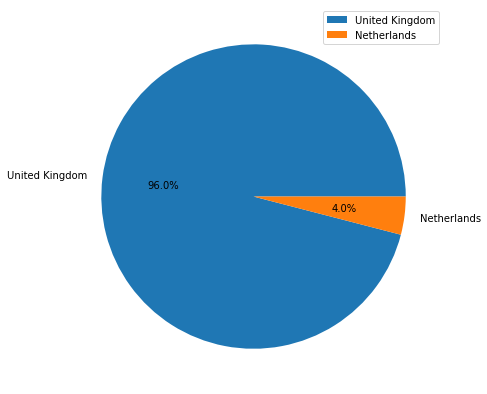

In [70]:
labels = 'United Kingdom','Netherlands'
value = [6767873.394,284661.540]
plt.figure(figsize=(7,7))
plt.pie(value, labels= labels, autopct='%1.1f%%')
plt.legend()
plt.show()

In [71]:
features['Percent']= features/features[0:2].sum() *100

In [72]:
features= features.drop('SUM', axis=1)

In [73]:
features[0:2].to_csv ('Cau_a.csv', index= True)

In [74]:
ratio = features['Percent'][0]/ features['Percent'][1]
ratio

23.775159067853007

### Câu b: Cho biết top 5 quốc gia có tỉ lệ mua hàng cao nhất. Đưa ra nhận xét ?

In [75]:
features= df[['Country', 'SUM']]
tmp= features.groupby('Country').sum().sort_values('SUM', ascending= False)
tmp[0:5]

,SUM
Country,
United Kingdom,6767873.394
Netherlands,284661.540
EIRE,250285.220
Germany,221698.210
France,196712.840


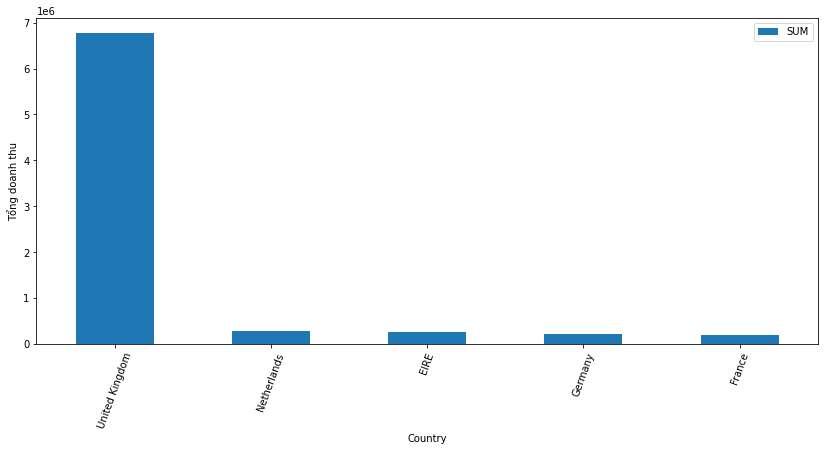

In [76]:
tmp[0:5].plot(kind= 'bar', figsize= (14,6), rot=70)
plt.ylabel('Tổng doanh thu')
plt.show()

In [77]:
tmp[0:5].to_csv('Cau_b.csv', index= True)

### Câu c: Cho biết top 10 sản phẩm bán chạy nhất?

In [78]:
product = df[['Description','Quantity']]
temp= product.groupby('Description').count().sort_values('Quantity', ascending= False)
top_10 = temp[:10]
top_10

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2070
REGENCY CAKESTAND 3 TIER,1905
JUMBO BAG RED RETROSPOT,1662
ASSORTED COLOUR BIRD ORNAMENT,1418
PARTY BUNTING,1416
LUNCH BAG RED RETROSPOT,1358
SET OF 3 CAKE TINS PANTRY DESIGN,1232
POSTAGE,1196
LUNCH BAG BLACK SKULL.,1126


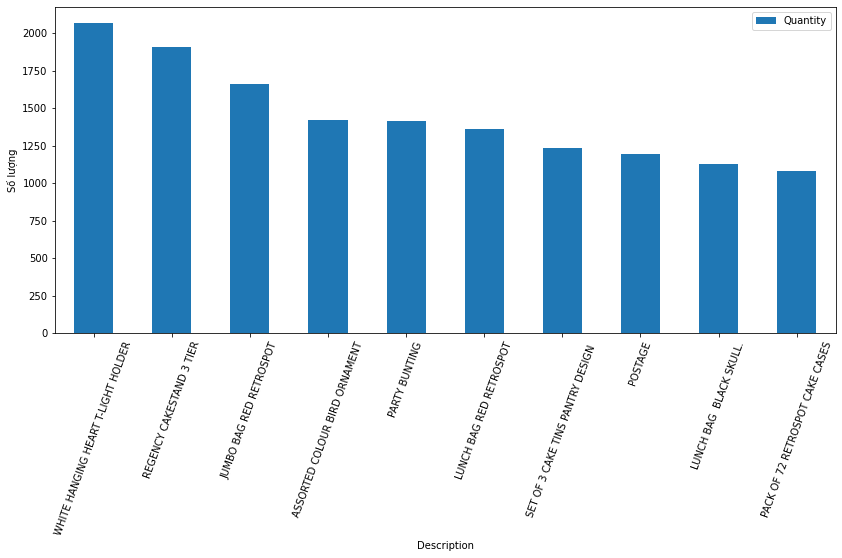

In [79]:
top_10.plot(kind= 'bar', figsize= (14,6), rot=70)
plt.ylabel('Số lượng')
plt.show()

In [80]:
top_10.to_csv('Cau_c.csv', index= True)